<a href="https://colab.research.google.com/github/poltorashka22/Data-analysis/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание: сравнение моделей линейной регрессии на данных Бостона

1. Загрузка данных
Файл 'boston.csv' успешно загружен
Размерность данных: 506 строк, 14 столбцов

Первые 5 строк данных:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

2. Проверка типов данных

Типы данных всех столбцов:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE

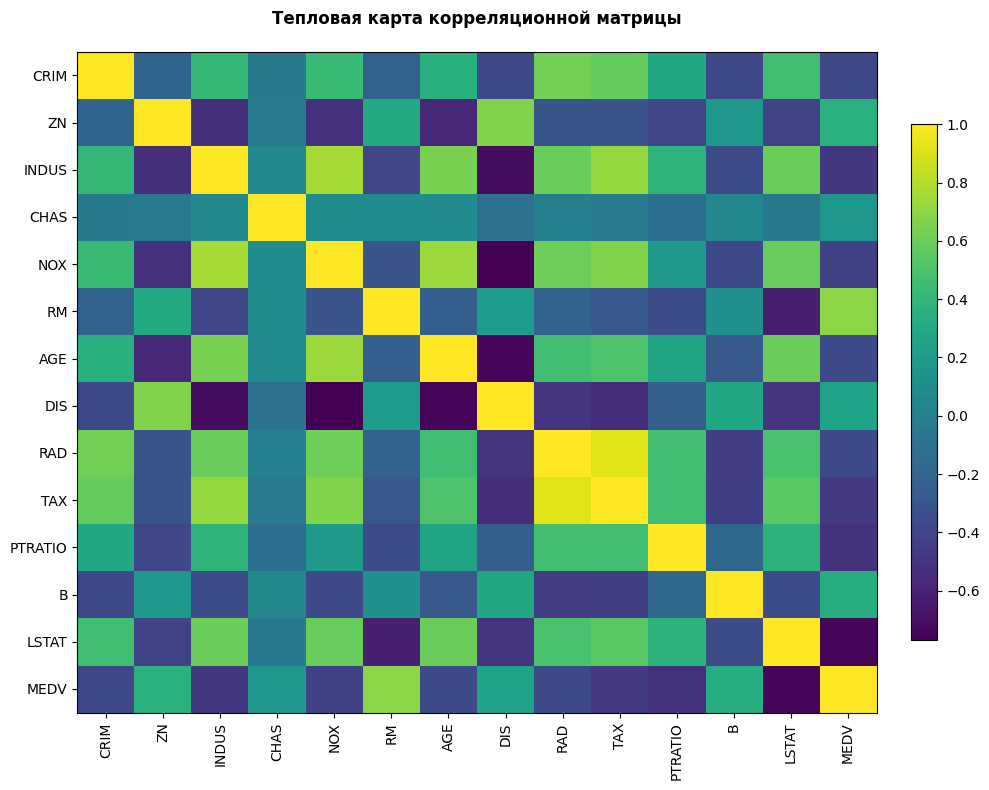


5. Выбор признаков для модели

Топ-5 признаков по корреляции с целевой переменной 'MEDV':
  LSTAT: -0.738 (отрицательная)
  RM: 0.695 (положительная)
  PTRATIO: -0.508 (отрицательная)
  INDUS: -0.484 (отрицательная)
  TAX: -0.469 (отрицательная)

6. Визуализация зависимостей между признаками и целевой переменной
Построение диаграмм рассеяния для выбранных признаков...


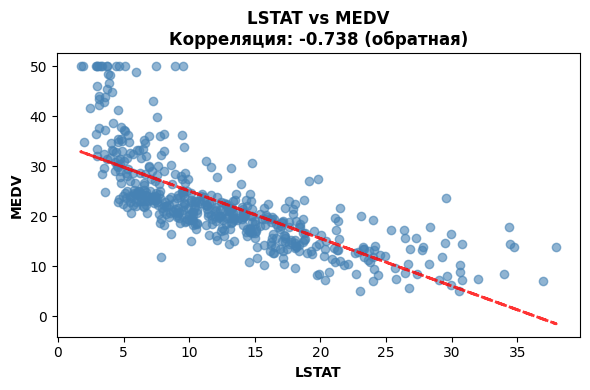

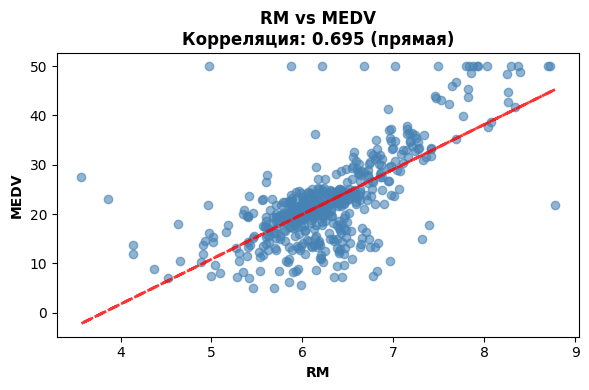

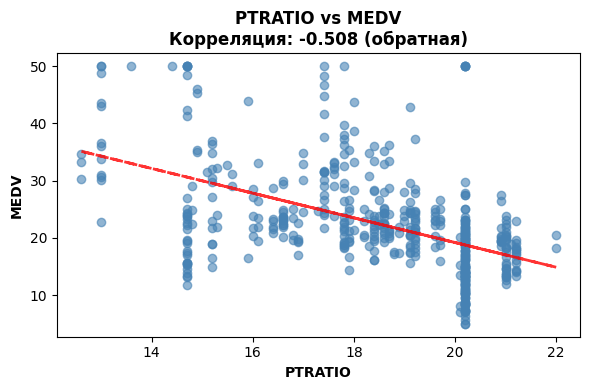

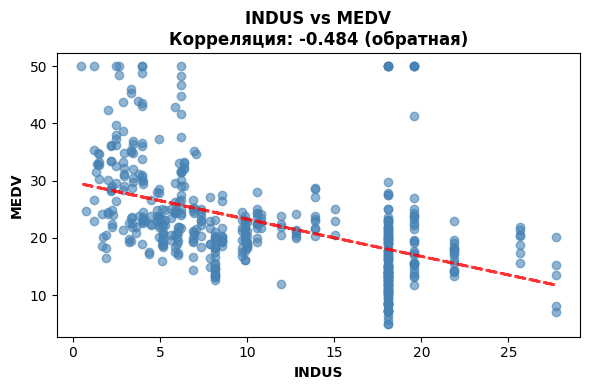

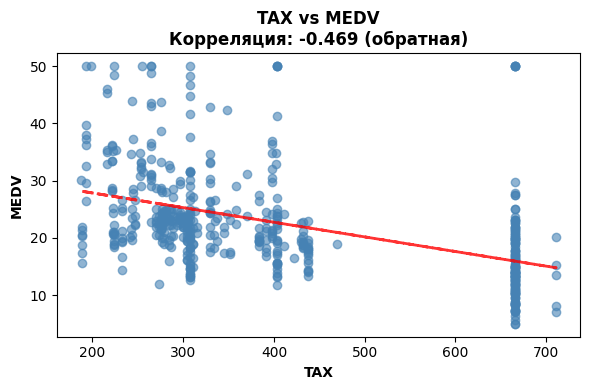


7. Подготовка данных для моделирования
Факторные признаки: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
Целевая переменная: MEDV
Размерность X: (506, 5)
Размерность y: (506,)

8. Разделение на обучающую и тестовую выборки
Разделение выполнено успешно:
  Обучающая выборка: 404 строк (79.8%)
  Тестовая выборка: 102 строк (20.2%)
  Количество признаков: 5

Модель 1: базовая линейная регрессия

Параметры модели:
Коэффициенты (веса признаков):
  LSTAT: -0.5576 (уменьшает стоимость)
  RM: 5.1040 (увеличивает стоимость)
  PTRATIO: -0.7936 (уменьшает стоимость)
  INDUS: 0.0946 (увеличивает стоимость)
  TAX: -0.0051 (уменьшает стоимость)
Свободный член (intercept): 13.0475

Метрики качества:
  Коэффициент детерминации R² (обучение): 0.6903
  Коэффициент детерминации R² (тест):    0.6197
  RMSE (обучение): 5.1873 тыс. $
  RMSE (тест):     5.2812 тыс. $

Анализ выбросов в целевой переменной

Визуализация распределения целевой переменной...


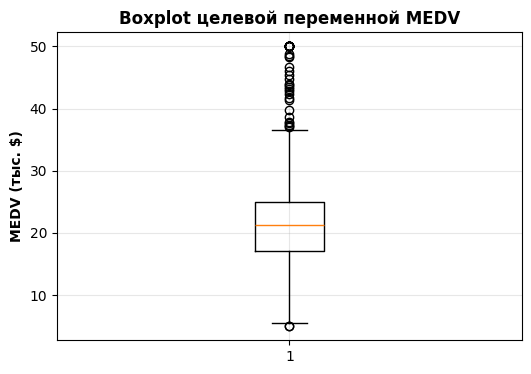


Статистика выбросов:
  Q1 (25-й перцентиль): 17.02
  Q3 (75-й перцентиль): 25.00
  IQR: 7.98
  Нижняя граница: 5.06
  Верхняя граница: 36.96
  Количество выбросов: 40
  Процент выбросов: 7.9%

Модель 2: линейная регрессия (без выбросов)
Данные после удаления выбросов:
  Исходный размер: 506 строк
  Новый размер: 466 строк
  Удалено строк: 40

Метрики качества (без выбросов):
  Коэффициент детерминации R² (обучение): 0.7037
  Коэффициент детерминации R² (тест):    0.6899
  RMSE (обучение): 3.5223 тыс. $
  RMSE (тест):     3.5269 тыс. $

Модель 3: Ridge-регрессия (регуляризация L2)

Параметры модели Ridge:
Коэффициенты (веса признаков):
  LSTAT: -0.5600 (уменьшает стоимость)
  RM: 5.0624 (увеличивает стоимость)
  PTRATIO: -0.7954 (уменьшает стоимость)
  INDUS: 0.0940 (увеличивает стоимость)
  TAX: -0.0050 (уменьшает стоимость)
Свободный член (intercept): 13.3670
Параметр регуляризации (alpha): 1.0

Метрики качества Ridge:
  Коэффициент детерминации R² (обучение): 0.6903
  Коэффициент де

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

print("=" * 70)
print("Задание: сравнение моделей линейной регрессии на данных Бостона")
print("=" * 70)

# Вспомогательная функция для расчета RMSE
def rmse(y_true, y_pred):
    """Расчет среднеквадратичной ошибки (Root Mean Squared Error)"""
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1. Загрузка данных
print("\n1. Загрузка данных")

path = "boston.csv"
df = pd.read_csv(path)

print(f"Файл '{path}' успешно загружен")
print(f"Размерность данных: {df.shape[0]} строк, {df.shape[1]} столбцов")

print("\nПервые 5 строк данных:")
print(df.head())

# 2. Проверка типов данных
print("\n2. Проверка типов данных")

print("\nТипы данных всех столбцов:")
print(df.dtypes)

# Преобразование нечисловых данных
print("\nПреобразование нечисловых данных:")

for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')
        print(f"  Столбец '{col}' преобразован в числовой тип")

print("\nТипы данных после преобразования:")
print(df.dtypes)

# 3. Обработка пропущенных значений
print("\n3. Обработка пропущенных значений")

print("\nКоличество пропущенных значений до обработки:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0] if missing_before.any() else "Пропущенные значения отсутствуют")

# Заполнение пропущенных значений медианами
medians = df.median(numeric_only=True)
df = df.fillna(medians)

print("\nКоличество пропущенных значений после обработки:")
missing_after = df.isnull().sum()
print(missing_after[missing_after > 0] if missing_after.any() else "Пропущенные значения отсутствуют")

# 4. Анализ корреляций
print("\n4. Анализ корреляций между признаками")

corr = df.corr()
print("\nКорреляционная матрица (первые 10 строк и столбцов):")
print(corr.round(3).iloc[:10, :10])

# Визуализация тепловой карты
print("\nПостроение тепловой карты корреляций...")

plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Тепловая карта корреляционной матрицы", fontweight='bold', pad=20)
plt.colorbar(fraction=0.03, pad=0.04)
plt.tight_layout()
plt.show()

# 5. Выбор признаков для модели
print("\n5. Выбор признаков для модели")

target = "MEDV"
corr_with_target = corr[target].drop(target).abs().sort_values(ascending=False)
top_features = corr_with_target.head(5).index.tolist()

print(f"\nТоп-5 признаков по корреляции с целевой переменной '{target}':")
for f in top_features:
    corr_value = corr[target][f]
    direction = "положительная" if corr_value > 0 else "отрицательная"
    print(f"  {f}: {corr_value:.3f} ({direction})")

# 6. Визуализация зависимостей
print("\n6. Визуализация зависимостей между признаками и целевой переменной")

print("Построение диаграмм рассеяния для выбранных признаков...")
for feat in top_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feat], df[target], alpha=0.6, color='steelblue')
    plt.xlabel(feat, fontweight='bold')
    plt.ylabel(target, fontweight='bold')

    corr_value = corr[target][feat]
    direction = "прямая" if corr_value > 0 else "обратная"
    plt.title(f"{feat} vs {target}\nКорреляция: {corr_value:.3f} ({direction})", fontweight='bold')

    # Линия тренда
    z = np.polyfit(df[feat], df[target], 1)
    p = np.poly1d(z)
    plt.plot(df[feat], p(df[feat]), "r--", alpha=0.8, linewidth=2)

    plt.tight_layout()
    plt.show()

# 7. Подготовка данных для моделирования
print("\n7. Подготовка данных для моделирования")

X = df[top_features]
y = df[target]

print(f"Факторные признаки: {top_features}")
print(f"Целевая переменная: {target}")
print(f"Размерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

# 8. Разделение на обучающую и тестовую выборки
print("\n8. Разделение на обучающую и тестовую выборки")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

print("Разделение выполнено успешно:")
print(f"  Обучающая выборка: {X_train.shape[0]} строк ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Тестовая выборка: {X_test.shape[0]} строк ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"  Количество признаков: {X_train.shape[1]}")

# 9. Модель 1: базовая линейная регрессия
print("\n" + "=" * 70)
print("Модель 1: базовая линейная регрессия")
print("=" * 70)

lin = LinearRegression()
lin.fit(X_train, y_train)

y_train_pred = lin.predict(X_train)
y_test_pred = lin.predict(X_test)

print("\nПараметры модели:")
print("Коэффициенты (веса признаков):")
for feat, coef in zip(X.columns, lin.coef_):
    direction = "увеличивает" if coef > 0 else "уменьшает"
    print(f"  {feat}: {coef:.4f} ({direction} стоимость)")
print(f"Свободный член (intercept): {lin.intercept_:.4f}")

print("\nМетрики качества:")
print(f"  Коэффициент детерминации R² (обучение): {r2_score(y_train, y_train_pred):.4f}")
print(f"  Коэффициент детерминации R² (тест):    {r2_score(y_test, y_test_pred):.4f}")
print(f"  RMSE (обучение): {rmse(y_train, y_train_pred):.4f} тыс. $")
print(f"  RMSE (тест):     {rmse(y_test, y_test_pred):.4f} тыс. $")

# 10. Анализ и обработка выбросов
print("\n" + "=" * 70)
print("Анализ выбросов в целевой переменной")
print("=" * 70)

print("\nВизуализация распределения целевой переменной...")
plt.figure(figsize=(6, 4))
plt.boxplot(df[target])
plt.title("Boxplot целевой переменной MEDV", fontweight='bold')
plt.ylabel("MEDV (тыс. $)", fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# Расчет выбросов
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_mask = (df[target] < lower) | (df[target] > upper)
outliers_count = outliers_mask.sum()
outliers_percent = outliers_count / len(df) * 100

print(f"\nСтатистика выбросов:")
print(f"  Q1 (25-й перцентиль): {Q1:.2f}")
print(f"  Q3 (75-й перцентиль): {Q3:.2f}")
print(f"  IQR: {IQR:.2f}")
print(f"  Нижняя граница: {lower:.2f}")
print(f"  Верхняя граница: {upper:.2f}")
print(f"  Количество выбросов: {outliers_count}")
print(f"  Процент выбросов: {outliers_percent:.1f}%")

# 11. Модель 2: линейная регрессия без выбросов
print("\n" + "=" * 70)
print("Модель 2: линейная регрессия (без выбросов)")
print("=" * 70)

df_no_out = df.loc[~outliers_mask].reset_index(drop=True)
X_no_out = df_no_out[top_features]
y_no_out = df_no_out[target]

print(f"Данные после удаления выбросов:")
print(f"  Исходный размер: {len(df)} строк")
print(f"  Новый размер: {len(df_no_out)} строк")
print(f"  Удалено строк: {len(df) - len(df_no_out)}")

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_no_out, y_no_out, test_size=0.2, random_state=42
)

lin2 = LinearRegression()
lin2.fit(X_train2, y_train2)

y_train2_pred = lin2.predict(X_train2)
y_test2_pred = lin2.predict(X_test2)

print("\nМетрики качества (без выбросов):")
print(f"  Коэффициент детерминации R² (обучение): {r2_score(y_train2, y_train2_pred):.4f}")
print(f"  Коэффициент детерминации R² (тест):    {r2_score(y_test2, y_test2_pred):.4f}")
print(f"  RMSE (обучение): {rmse(y_train2, y_train2_pred):.4f} тыс. $")
print(f"  RMSE (тест):     {rmse(y_test2, y_test2_pred):.4f} тыс. $")

# 12. Модель 3: Ridge-регрессия
print("\n" + "=" * 70)
print("Модель 3: Ridge-регрессия (регуляризация L2)")
print("=" * 70)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_train_ridge = ridge.predict(X_train)
y_test_ridge = ridge.predict(X_test)

print("\nПараметры модели Ridge:")
print("Коэффициенты (веса признаков):")
for feat, coef in zip(X.columns, ridge.coef_):
    direction = "увеличивает" if coef > 0 else "уменьшает"
    print(f"  {feat}: {coef:.4f} ({direction} стоимость)")
print(f"Свободный член (intercept): {ridge.intercept_:.4f}")
print(f"Параметр регуляризации (alpha): {ridge.alpha}")

print("\nМетрики качества Ridge:")
print(f"  Коэффициент детерминации R² (обучение): {r2_score(y_train, y_train_ridge):.4f}")
print(f"  Коэффициент детерминации R² (тест):    {r2_score(y_test, y_test_ridge):.4f}")
print(f"  RMSE (обучение): {rmse(y_train, y_train_ridge):.4f} тыс. $")
print(f"  RMSE (тест):     {rmse(y_test, y_test_ridge):.4f} тыс. $")

# 13. Модель 4: полиномиальная регрессия
print("\n" + "=" * 70)
print("Модель 4: полиномиальная регрессия (степень 3)")
print("=" * 70)

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lin", LinearRegression())
])
poly_model.fit(X_train, y_train)

y_train_poly = poly_model.predict(X_train)
y_test_poly = poly_model.predict(X_test)

print("\nХарактеристики полиномиальной модели:")
print(f"  Степень полинома: 3")
print(f"  Исходное количество признаков: {X_train.shape[1]}")
print(f"  Количество признаков после преобразования: {poly_model.named_steps['poly'].n_output_features_}")

print("\nМетрики качества полиномиальной модели:")
print(f"  Коэффициент детерминации R² (обучение): {r2_score(y_train, y_train_poly):.4f}")
print(f"  Коэффициент детерминации R² (тест):    {r2_score(y_test, y_test_poly):.4f}")
print(f"  RMSE (обучение): {rmse(y_train, y_train_poly):.4f} тыс. $")
print(f"  RMSE (тест):     {rmse(y_test, y_test_poly):.4f} тыс. $")

# 14. Сравнительный анализ моделей
print("\n" + "=" * 70)
print("Сравнительный анализ всех моделей")
print("=" * 70)

# Создание таблицы результатов
results = pd.DataFrame({
    "Модель": ["Линейная (исходные данные)", "Линейная (без выбросов)", "Ridge (L2 регуляризация)", "Полиномиальная (степень 3)"],
    "R²_обучение": [
        r2_score(y_train, y_train_pred),
        r2_score(y_train2, y_train2_pred),
        r2_score(y_train, y_train_ridge),
        r2_score(y_train, y_train_poly),
    ],
    "R²_тест": [
        r2_score(y_test, y_test_pred),
        r2_score(y_test2, y_test2_pred),
        r2_score(y_test, y_test_ridge),
        r2_score(y_test, y_test_poly),
    ],
    "RMSE_обучение": [
        rmse(y_train, y_train_pred),
        rmse(y_train2, y_train2_pred),
        rmse(y_train, y_train_ridge),
        rmse(y_train, y_train_poly),
    ],
    "RMSE_тест": [
        rmse(y_test, y_test_pred),
        rmse(y_test2, y_test2_pred),
        rmse(y_test, y_test_ridge),
        rmse(y_test, y_test_poly),
    ],
    "Разница_R²": [
        r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred),
        r2_score(y_train2, y_train2_pred) - r2_score(y_test2, y_test2_pred),
        r2_score(y_train, y_train_ridge) - r2_score(y_test, y_test_ridge),
        r2_score(y_train, y_train_poly) - r2_score(y_test, y_test_poly),
    ]
})

print("\nИтоговая таблица результатов:")
print(results.round(4))

print("\nАнализ результатов:")
print("-" * 50)

# Анализ переобучения
for i, row in results.iterrows():
    model_name = row["Модель"]
    r2_diff = row["Разница_R²"]

    if r2_diff < 0.05:
        overfit_status = "Нет переобучения"
    elif r2_diff < 0.1:
        overfit_status = "Небольшое переобучение"
    elif r2_diff < 0.2:
        overfit_status = "Умеренное переобучение"
    else:
        overfit_status = "Сильное переобучение"

    print(f"{model_name}:")
    print(f"  Качество (R² на тесте): {row['R²_тест']:.3f}")
    print(f"  Ошибка прогноза (RMSE): {row['RMSE_тест']:.2f} тыс. $")
    print(f"  Переобучение: {overfit_status} (разница R²: {r2_diff:.3f})")
    print()

# Определение лучшей модели
best_model_idx = results["R²_тест"].idxmax()
best_model = results.loc[best_model_idx, "Модель"]
best_r2 = results.loc[best_model_idx, "R²_тест"]
best_rmse = results.loc[best_model_idx, "RMSE_тест"]

print(f"\nЛучшая модель: {best_model}")
print(f"   Коэффициент детерминации R²: {best_r2:.4f}")
print(f"   Средняя ошибка прогноза: {best_rmse:.2f} тыс. $")

# 15. Сохранение результатов
print("\n" + "=" * 70)
print("Сохранение результатов")
print("=" * 70)

# Сохранение таблицы результатов
results.to_csv("lab06_results_summary.csv", index=False, encoding='utf-8-sig')
print("Таблица результатов сохранена в файл 'lab06_results_summary.csv'")

# Сохранение прогнозов для тестовой выборки
test_preds = X_test.copy()
test_preds["y_true"] = y_test.values
test_preds["y_pred_linear"] = y_test_pred
test_preds["y_pred_ridge"] = y_test_ridge
test_preds["y_pred_poly"] = y_test_poly
test_preds.to_csv("lab06_test_predictions.csv", index=False)
print("Прогнозы для тестовой выборки сохранены в файл 'lab06_test_predictions.csv'")

print("\n" + "=" * 70)
print("Выполнение программы завершено успешно")
print("=" * 70)
print("\nИтоговые файлы:")
print("  1. lab06_results_summary.csv - сравнительная таблица моделей")
print("  2. lab06_test_predictions.csv - прогнозы на тестовой выборке")